In [2]:
from util import *
from metrics import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
years = range(2009, 2018) # Don't include 2018 because many airports were added that weren't in the other years

In [4]:
graphs = []  # save as array of networks
for i in years:
    eval(f"graphs.append(create_graph(pd.read_csv('data/{i}_grouped.csv')))")  # use `eval` for automation

In [5]:
# for i in years: 
#     eval(f"viz_map(pd.read_csv('data/{i}_grouped.csv'), {i})")

In [6]:
# make graphs undirected and add up edges

graphs = [to_undirected_graph(i) for i in graphs]

In [7]:
num_nodes = []
num_edges = []
for i in graphs:
    print(i)
    num_nodes.append(i.number_of_nodes())
    num_edges.append(i.number_of_edges())


# print(graphs[-2].nodes())
# print(graphs[-1].nodes())

main_list = list(set(graphs[-3].nodes()) - set(graphs[-2].nodes()))
print(main_list)

Graph with 296 nodes and 2341 edges
Graph with 305 nodes and 2347 edges
Graph with 299 nodes and 2324 edges
Graph with 312 nodes and 2379 edges
Graph with 319 nodes and 2399 edges
Graph with 325 nodes and 2412 edges
Graph with 322 nodes and 2384 edges
Graph with 313 nodes and 2342 edges
Graph with 318 nodes and 2436 edges
['CLD', 'CMI', 'CNY', 'STC', 'ILG', 'DIK', 'ALO', 'VEL', 'DBQ', 'PUB', 'TOL', 'COU', 'CEC', 'SUX']


Text(0, 0.5, 'num edges')

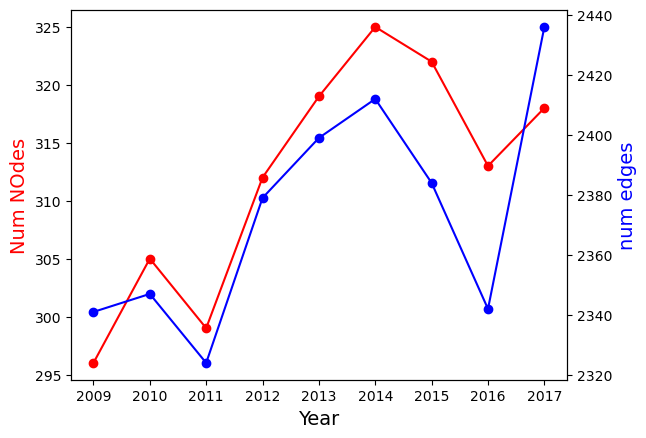

In [8]:
fig, ax = plt.subplots()
ax.plot(years, num_nodes, color="r")
ax.set_xlabel("Year", fontsize=14)
ax.scatter(years, num_nodes, color="r")
ax.set_ylabel("Number of nodes", color="red", fontsize=14)

ax2 = ax.twinx()
ax2.plot(years, num_edges, color="b")
ax2.scatter(years, num_edges, color="b")
ax2.set_ylabel("Number of edges", color="blue", fontsize=14)
plt.savefig(f"./images/nodes.jpg", format="jpg", bbox_inches="tight")


In [9]:
mean_degree_list = []
for i in graphs:
    mean_degree_list.append(get_mean_degree(i))
    

Text(0, 0.5, 'Mean Degree')

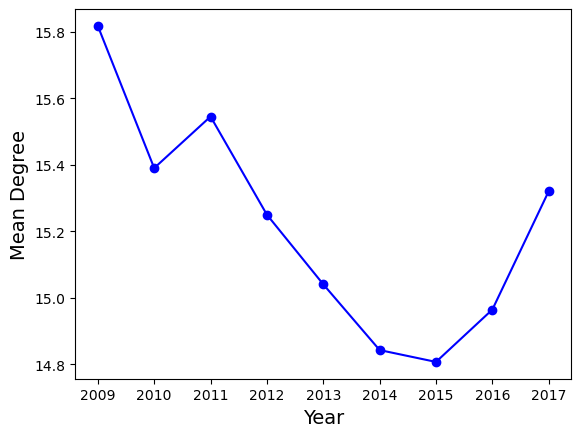

In [11]:
plt.plot(years, mean_degree_list, color="b")
plt.scatter(years, mean_degree_list, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Mean Degree", fontsize=14)
plt.savefig(f"./images/mean_degree.jpg", format="jpg", bbox_inches="tight")

In [12]:
efficiency_list = []
for i in graphs:
    efficiency_list.append(calculate_network_efficiency(i))

Text(0, 0.5, 'Efficiency')

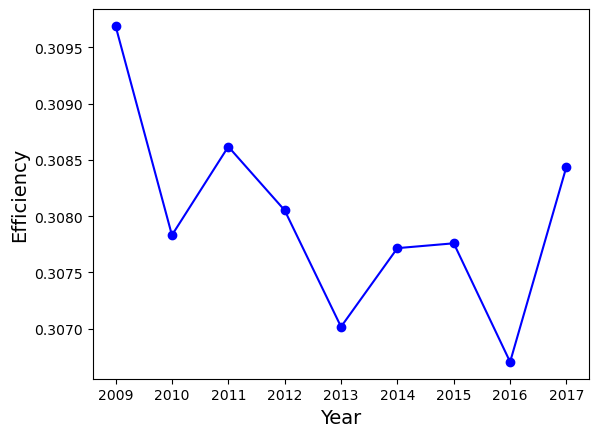

In [13]:
plt.plot(years, efficiency_list, color="b")
plt.scatter(years, efficiency_list, color="b")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Efficiency", fontsize=14)
plt.savefig(f"./images/network_efficiency.jpg", format="jpg", bbox_inches="tight")